<a href="https://colab.research.google.com/github/arkeodev/time-series/blob/main/Statistical_Time_Series_Analysis/15-SARIMAX-model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 15. SARIMAX Models

## 1. Introduction

Seasonality in data can often mask real trends and cycles, leading to less accurate models and predictions. This is where SARIMAX, or Seasonal Autoregressive Integrated Moving Average with eXogenous variables model, becomes crucial for time series analysis. 

Seasonality refers to periodic fluctuations in financial data that occur at regular intervals, such as quarterly fiscal reports or annual shopping seasons. Ignoring these patterns can render a model ineffective, as it fails to account for predictable changes over time.

## 2. Mathematical Definition

The mathematical expression for SARIMAX(1,0,2)(2,0,1,5) is illustrated as follows:

(*SARIMAX(1,0,2)(2,0,1,5) means that the model is an ARIMA(1,0,2) model with a seasonal component of AR(2) and MA(1) with a period of 5 (2,0,1,5)*)

$$
Y_t = c + \phi_1 Y_{t-1} + \theta_1 \varepsilon_{t-1} + \theta_2 \varepsilon_{t-2} + \Phi_1(Y_{t-5} + Y_{t-6}) + \Theta_1(\varepsilon_{t-5} + \varepsilon_{t-6}) + \varepsilon_t
$$

Where:
- $ Y_t $ is the value of the time series at time t,
- $ c $ is the constant term,
- $ \phi_1 $ is the coefficient for the first autoregressive term,
- $ \theta_1 $ and $ \theta_2 $ are coefficients for the first and second moving average terms,
- $ \Phi_1 $ is the seasonal autoregressive coefficient applied to the values 5 and 6 periods ago,
- $ \Theta_1 $ is the seasonal moving average coefficient applied to the errors 5 and 6 periods ago,
- $ \varepsilon_t $ is the error term at time t.

This model structure allows for capturing both the short-term dynamics (with AR and MA terms) and the seasonal effects (with seasonal AR and MA terms) on the time series. The SARIMAX framework can handle complex time series behaviors and is widely used in economic and financial forecasting, where seasonality and external factors are common.

## 3. Implementation

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.02077D-01    |proj g|=  3.19272D-01

At iterate    5    f=  7.85566D-01    |proj g|=  1.74564D-02

At iterate   10    f=  7.85235D-01    |proj g|=  4.57360D-03

At iterate   15    f=  7.84915D-01    |proj g|=  1.32230D-02

At iterate   20    f=  7.84886D-01    |proj g|=  2.87353D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     24      1     0     0   2.874D-06   7.849D-01
  F =  0.78488624018204389     

CONVERG

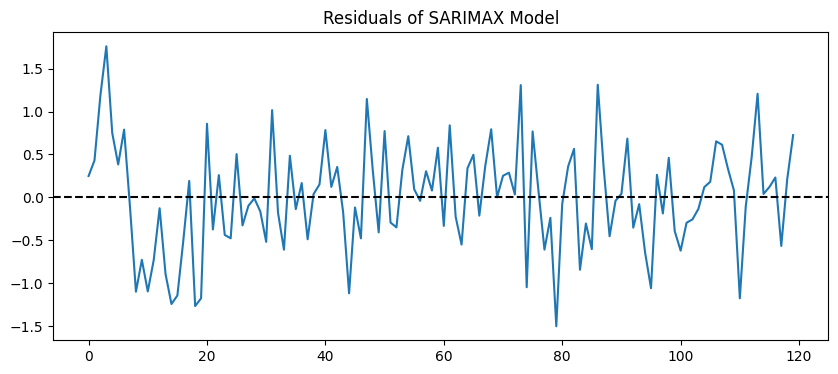

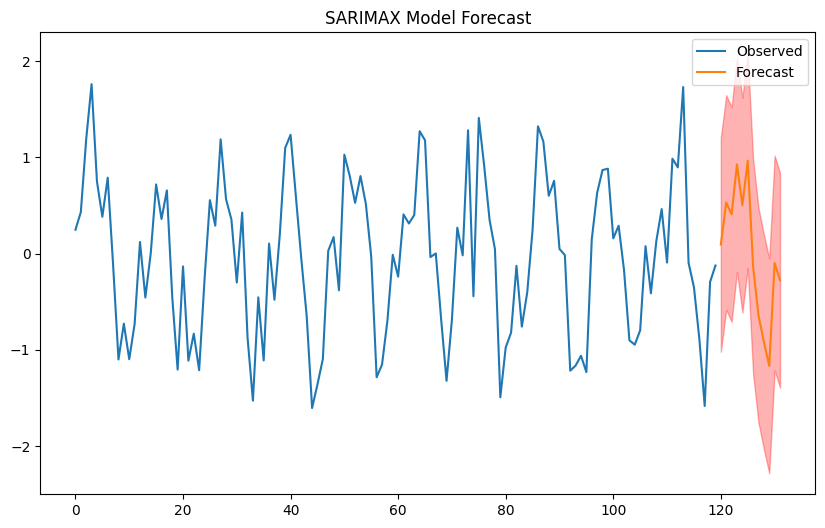

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# -----------------------------------------------------------------------------------
# 1. Generate Synthetic Seasonal Data
# -----------------------------------------------------------------------------------
# - We simulate a sinusoidal pattern with period=12 to mimic seasonality.
# - Add random noise for realism.
# - n=120 data points (e.g., 10 years of monthly data).
# -----------------------------------------------------------------------------------
np.random.seed(42)
n = 120
seasonal_period = 12
data = np.sin(2 * np.pi * np.arange(n) / seasonal_period) \
       + np.random.normal(0, 0.5, n)

# -----------------------------------------------------------------------------------
# 2. Fit a SARIMAX Model
# -----------------------------------------------------------------------------------
# - order=(1, 0, 1) => AR(1) + MA(1) on the non-seasonal component
# - seasonal_order=(1, 1, 0, seasonal_period) => Seasonal AR(1), Seasonal differencing (D=1)
#   with no seasonal MA, repeating every 12 points.
# -----------------------------------------------------------------------------------
model = SARIMAX(data,
                order=(1, 0, 1),
                seasonal_order=(1, 1, 0, seasonal_period))
results = model.fit()

# -----------------------------------------------------------------------------------
# 3. Print Model Summary
# -----------------------------------------------------------------------------------
print(results.summary())

# -----------------------------------------------------------------------------------
# 4. Residual Analysis
# -----------------------------------------------------------------------------------
# - We check if the residuals are roughly centered around zero,
#   indicating that the model captured most of the signal.
# -----------------------------------------------------------------------------------
residuals = results.resid
plt.figure(figsize=(10, 4))
plt.plot(residuals)
plt.title('Residuals of SARIMAX Model')
plt.axhline(0, color='black', linestyle='--')
plt.show()

# -----------------------------------------------------------------------------------
# 5. Forecast the Next 12 Observations
# -----------------------------------------------------------------------------------
# - get_forecast(steps=12) predicts one season ahead.
# - predicted_mean: forecast values
# - conf_int: confidence intervals
# -----------------------------------------------------------------------------------
forecast = results.get_forecast(steps=12)
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# -----------------------------------------------------------------------------------
# 6. Plot the Original Series and the Forecast
# -----------------------------------------------------------------------------------
# - We overlay the forecast on the original data, highlighting the 
#   confidence interval region in red.
# -----------------------------------------------------------------------------------
plt.figure(figsize=(10, 6))
plt.plot(data, label='Observed')
plt.plot(np.arange(n, n + 12), forecast_mean, label='Forecast')
plt.fill_between(np.arange(n, n + 12),
                 conf_int[:, 0],
                 conf_int[:, 1],
                 color='red', alpha=0.3)
plt.title('SARIMAX Model Forecast')
plt.legend()
plt.show()


**Interpretation**

1. **Convergence & Optimization**  
   - The L-BFGS-B optimization converged successfully (`CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL`) after 20 iterations, indicating a stable parameter solution.

2. **Model Specification**  
   - **SARIMAX(1, 0, 1) x (1, 1, 0, 12)**
     - Nonseasonal AR(1) and MA(1), plus a seasonal AR(1) with one seasonal difference $(D=1)$ and period 12.

3. **Parameter Estimates**  
   - **ar.L1 = 0.4479** $(p=0.702)$: Not statistically significant.  
   - **ma.L1 = -0.5094** $(p=0.648)$: Not significant.  
   - **ar.S.L12 = -0.5303** $(p<0.001)$: Highly significant seasonal AR term.  
   - **$\sigma^2 = 0.3229$** $(p<0.001)$: Significant error variance estimate.

4. **Model Fit & Diagnostics**  
   - **Log Likelihood = -94.186**, **AIC = 196.373**, **BIC = 207.101**.  
   - **Ljung-Box (Q)** at lag 1: $p=0.89$ → No evidence of autocorrelation in residuals.  
   - **Jarque-Bera** $p=0.96$ → Residuals appear normally distributed.  
   - **Heteroskedasticity test** $p=0.68$ → No significant change in variance.

5. **Overall Conclusion**  
   - The **seasonal AR(1)** component is significant, capturing seasonal dependence.  
   - The **nonseasonal AR(1)** and **MA(1)** terms are not statistically significant.  
   - Residual diagnostics indicate no major issues with autocorrelation, normality, or heteroskedasticity.  
   - Thus, the primary driver appears to be the **seasonal AR** effect and a stable overall variance $(\sigma^2)$.